<a href="https://colab.research.google.com/github/saketlakhotia17/IBM_MachineLearning/blob/main/8.%20ROC%20%26%20Precision%20Recall/Exp9_ML_I027(IBM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#KNN algorithm with Titanic dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sn


data = pd.read_csv('Titanic.csv')
data.shape
data.head()

#Convert categorical variable to numeric
data['Sex_cleaned'] = np.where(data['Sex']=='male',0,1)
data.head()
data['Embarked_cleaned'] = np.where(data['Embarked']=='S',0, np.where(data['Embarked']=='C',1, np.where(data['Embarked']=='Q',2,3)))
data.head()

# handling missing data
data = data[['Survived','Pclass', 'Sex_cleaned', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_cleaned']].dropna(axis =0, how = 'any')
data.shape
data.head()


X =data[['Pclass', 'Sex_cleaned', 'Age', 'SibSp', 'Parch', 'Fare','Embarked_cleaned']]
y = data['Survived']


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.20,random_state =4)


#feature scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
data.head()

,Survived,Pclass,Sex_cleaned,Age,SibSp,Parch,Fare,Embarked_cleaned
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [ ]:
data.shape

(714, 8)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=14)
classifier.fit(X_train, y_train)

#predict
y_pred = classifier.predict(X_test)


In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[75,  4],
       [23, 41]])

In [ ]:
#Precision and Recall
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_pred)

0.9111111111111111

In [ ]:
recall_score(y_test, y_pred)

0.640625

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.7522935779816514

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(classifier, X_train, y_train, cv=3, method = 'predict')
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

Text(0.5, 1.0, 'Precision Recall Curve')

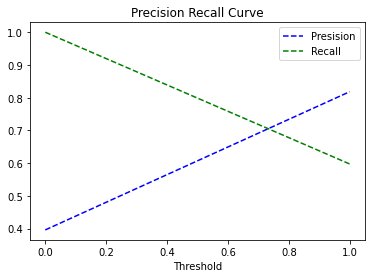

In [ ]:
plt.plot(thresholds, precisions[:-1],'b--', label='Presision')
plt.plot(thresholds, recalls[:-1],'g--', label='Recall')
plt.legend(loc='upper right')
plt.xlabel("Threshold")
plt.title("Precision Recall Curve")

Text(0, 0.5, 'Recalls')

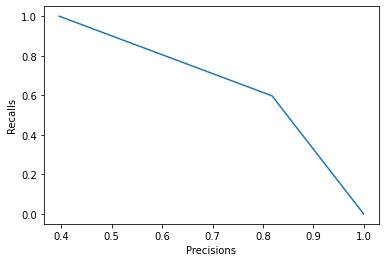

In [ ]:
#precision vs recall
plt.plot(precisions,recalls)
plt.xlabel('Precisions')
plt.ylabel('Recalls')


Text(0.5, 1.0, 'True Positive Rate')

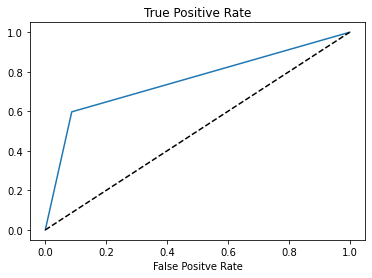

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train, y_score)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positve Rate")
plt.title("True Positive Rate")


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train,y_scores)

0.7551943055021162